In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle


In [76]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [78]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [14]:
data.shape

(500, 9)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [26]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [80]:
data = data.drop(columns=['Serial No.'])

In [82]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [84]:
data.describe() #statistics of data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [86]:
data['University Rating']=data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']= data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']=data['GRE Score'].fillna(data['GRE Score'].mean())

In [88]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


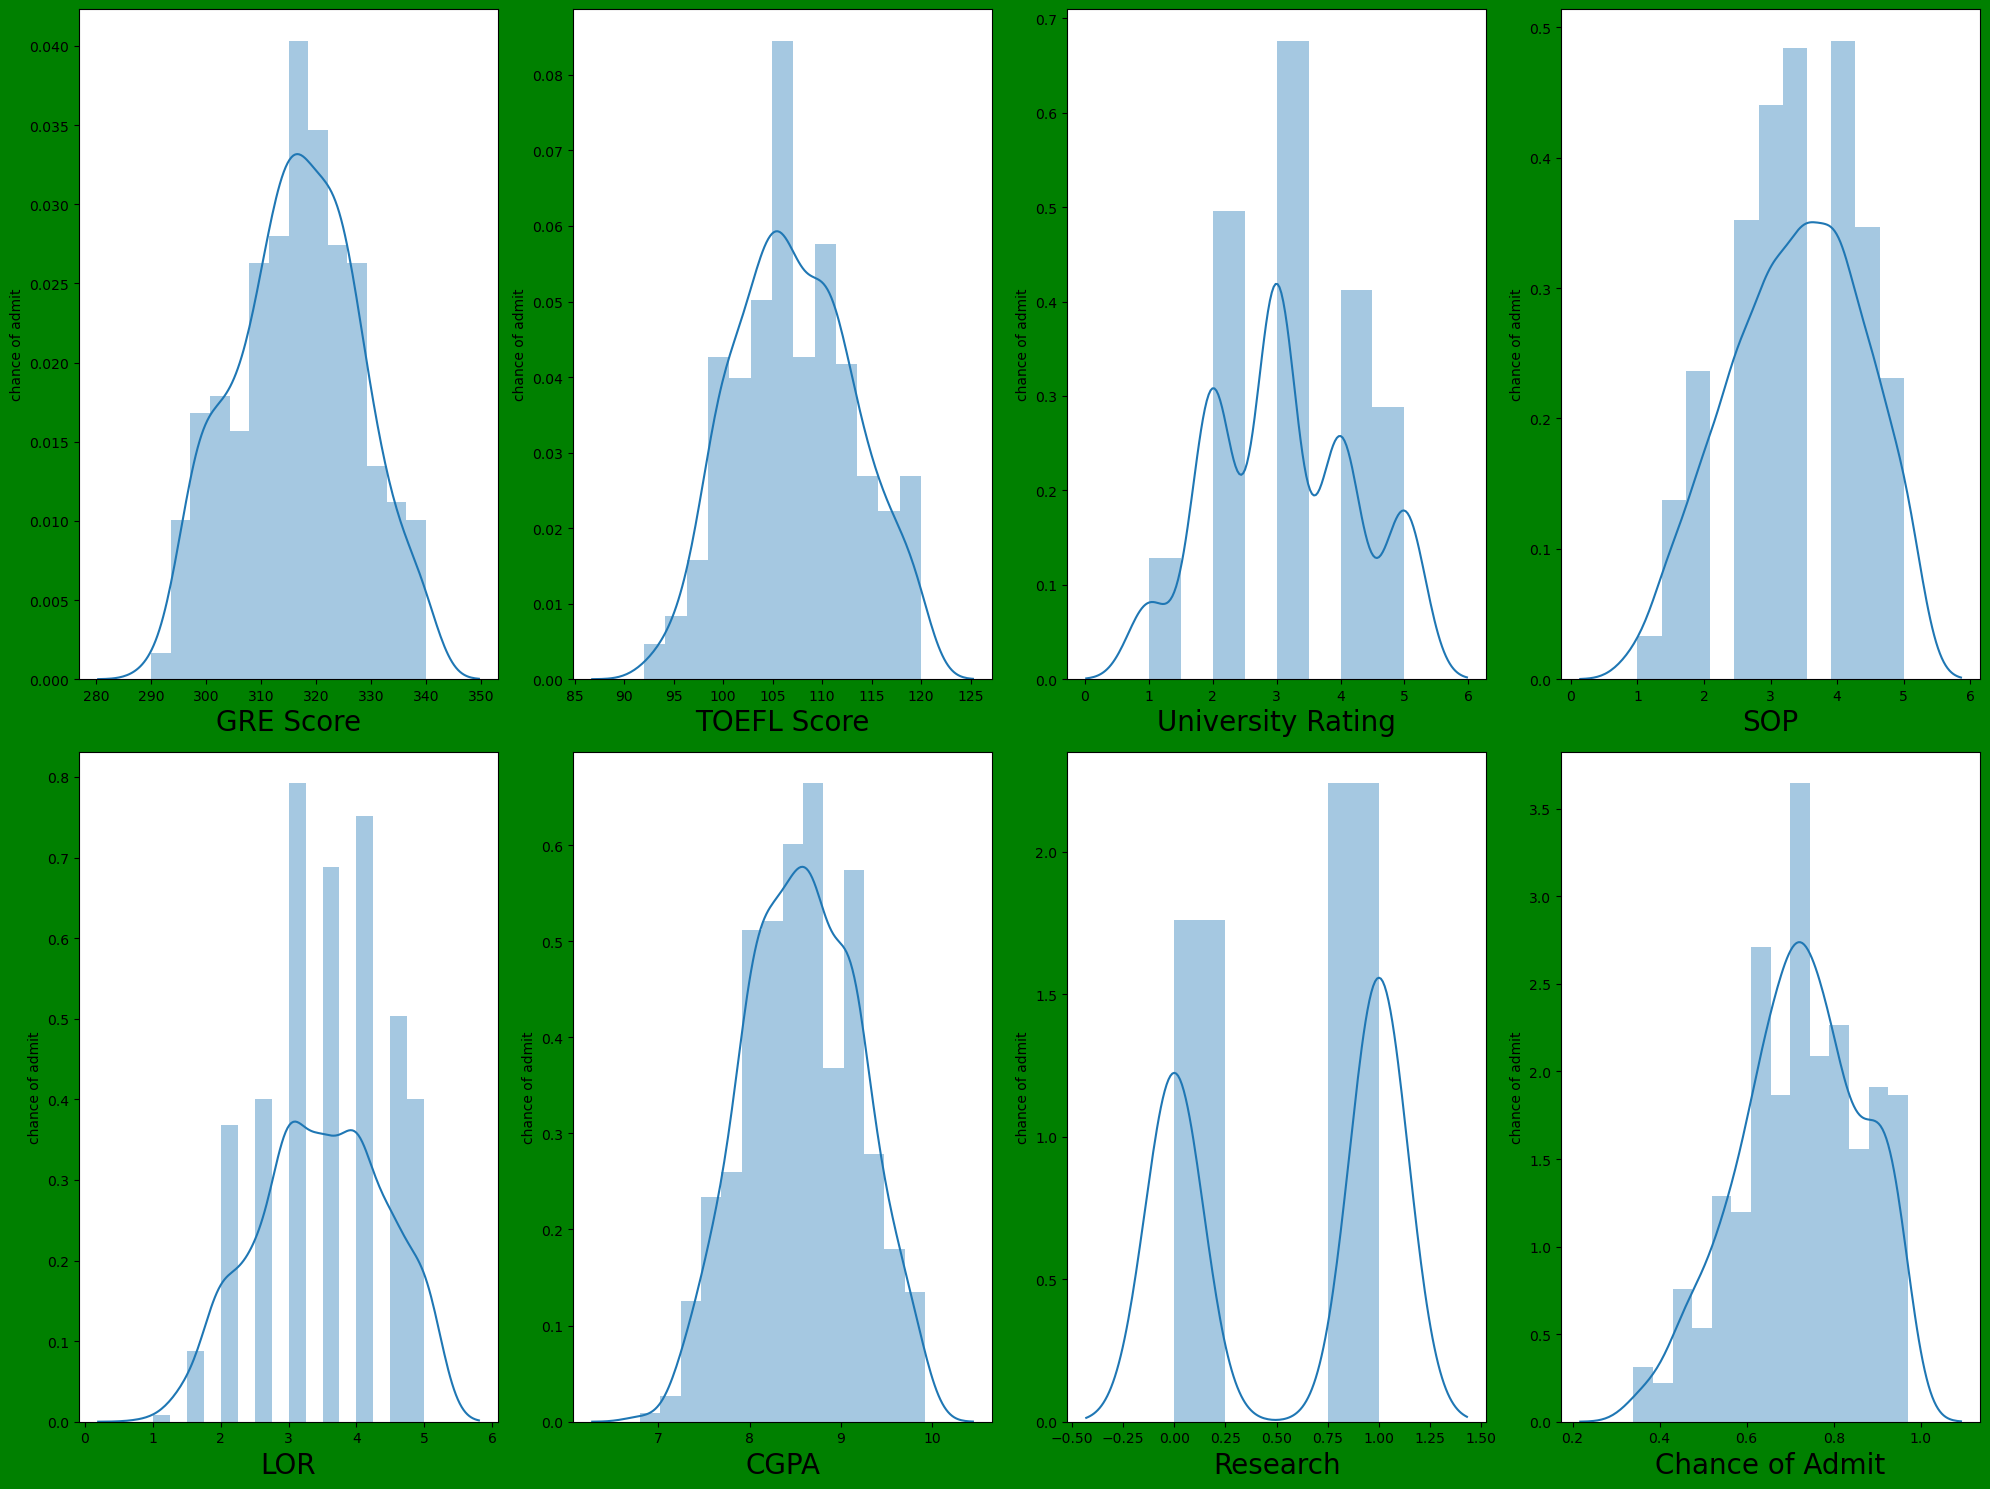

In [166]:
# lets see how data is distributed for every column
plt.figure(figsize=(20,15), facecolor='green')
plotnumber = 1
for column in data:
    if plotnumber<=8:
        ax= plt.subplot(2,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('chance of admit')
    plotnumber+=1
plt.tight_layout()

In [100]:
x = data.drop(columns = ['Chance of Admit']) #all columns axcept "Chance of Admit"
y = data['Chance of Admit']


In [102]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


In [104]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

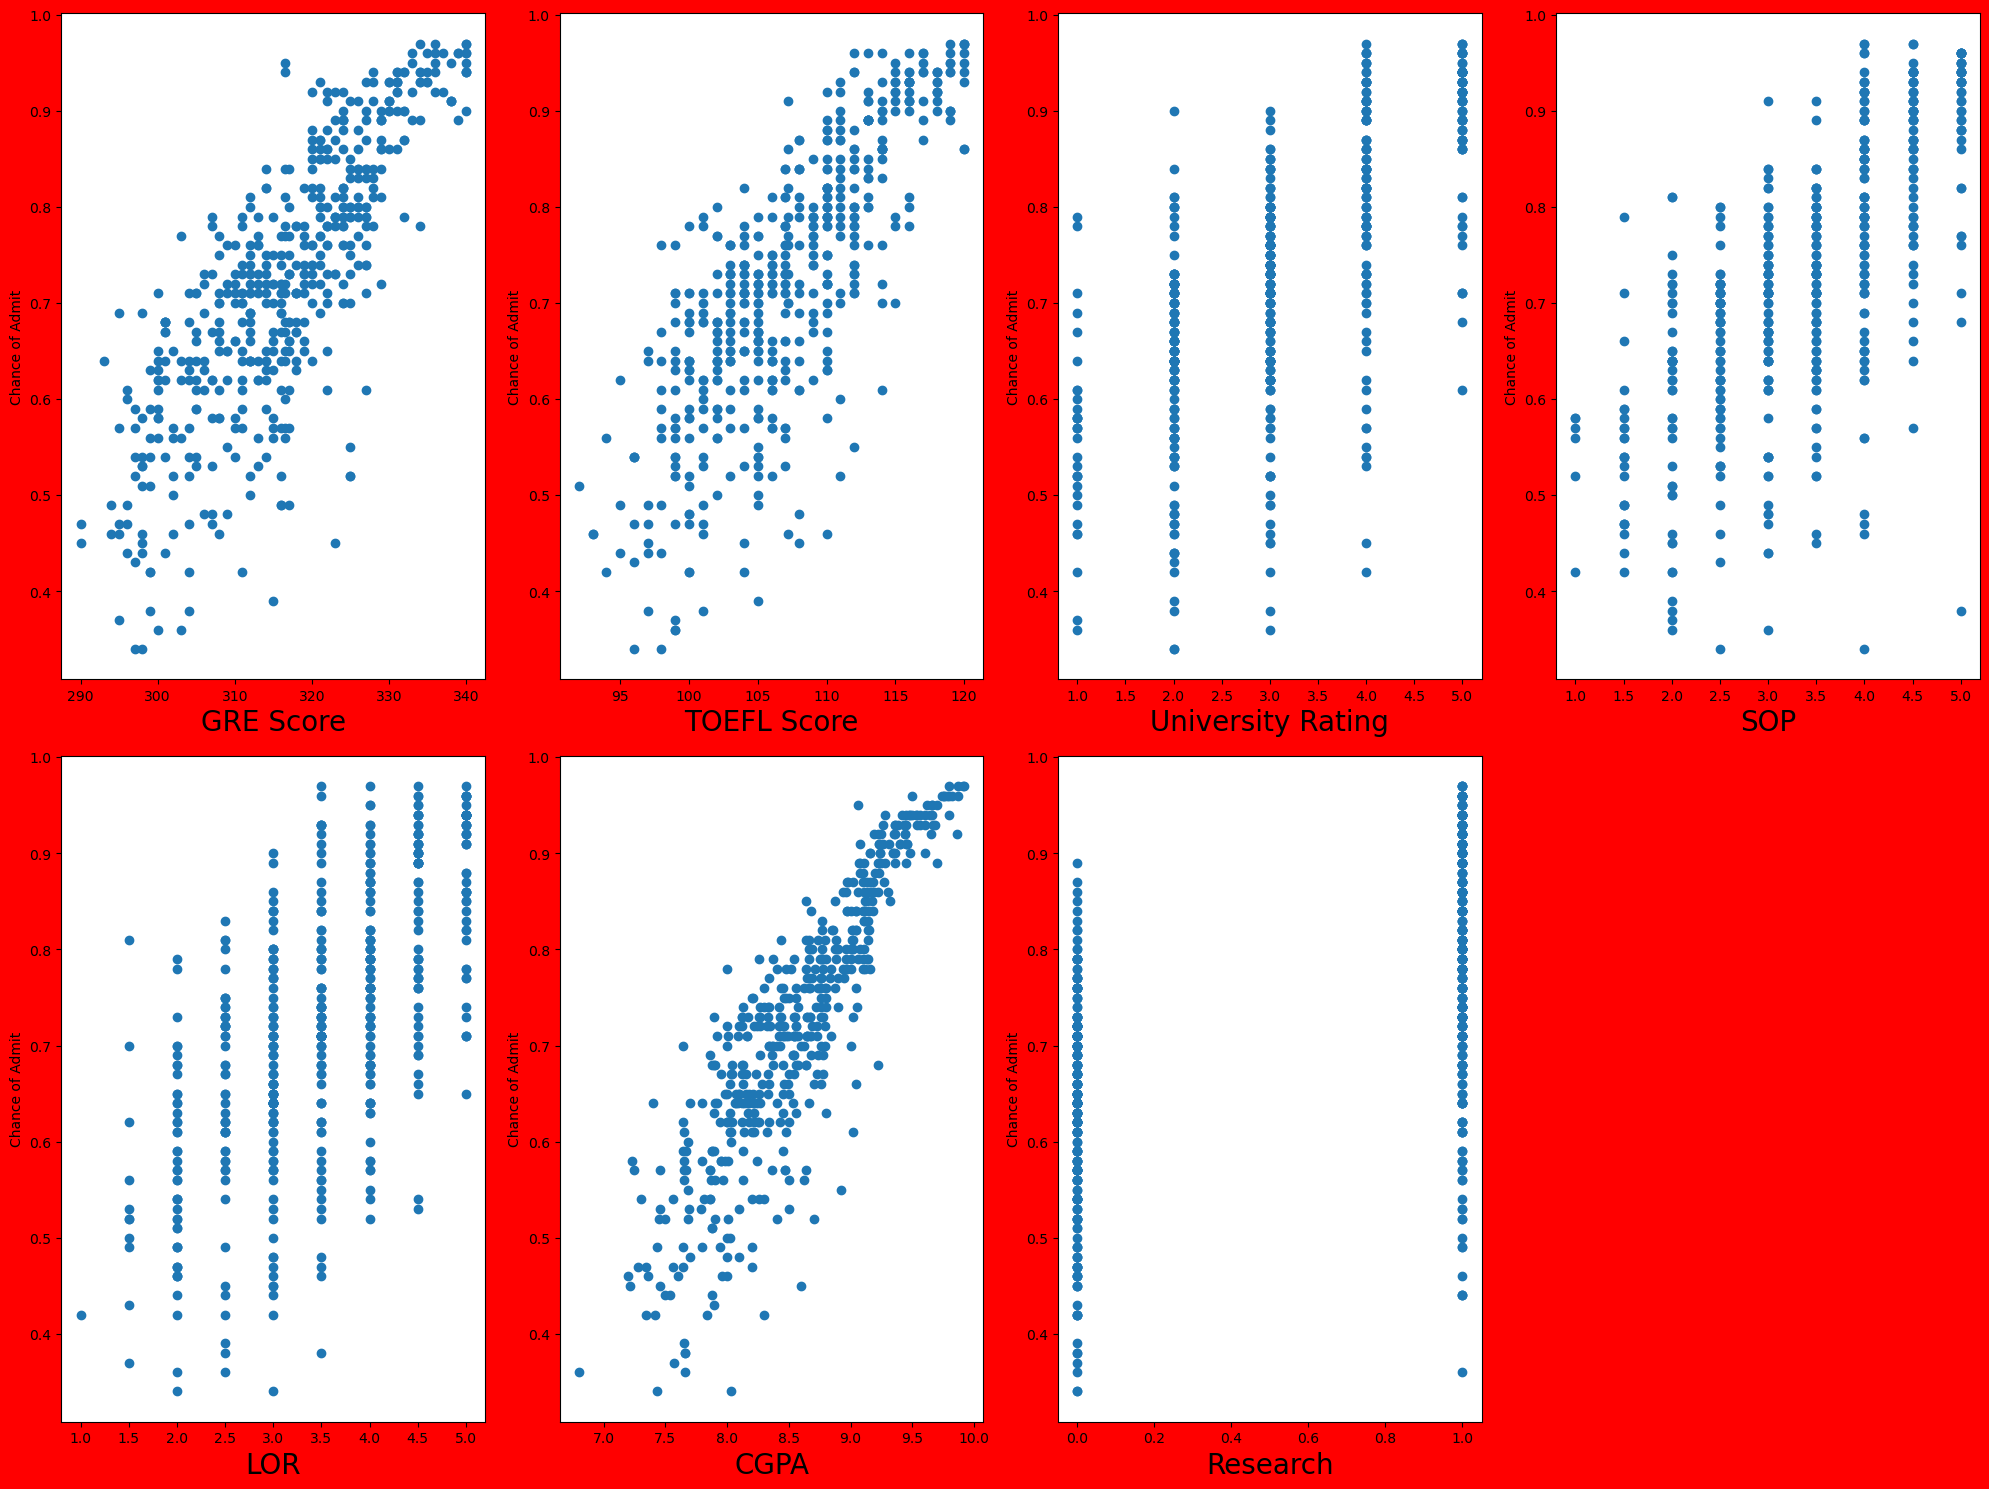

In [108]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1
for column in x:
    if plotnumber<=8:
        ax= plt.subplot(2,4, plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Chance of Admit', fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [110]:
scaler = StandardScaler() #only use on features
x_scaled = scaler.fit_transform(x)


In [112]:
x_scaled #now the data is in scaled form

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [120]:
#split data into train and test. Model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state=348)
y_train

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
       ... 
91     0.38
213    0.96
157    0.65
264    0.75
83     0.92
Name: Chance of Admit, Length: 375, dtype: float64

In [124]:
regression = LinearRegression()
regression.fit(x_train,y_train) #model training happend

LinearRegression()

In [128]:
#you can save the model using Pickle, like import pickle
#saving the model to the local file system
pickle.dump(regression, open('Reg_Training_model', 'wb')) #wb=write

In [132]:
#prediction using the same model
#we are going to predict one student data for reference
load_model = pickle.load(open('Reg_Training_model', 'rb')) #rb= read
a = load_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))
a

array([0.63715829])

In [136]:
#lets check how well model fits on train data
#Adjusted R2 score
regression.score(x_train,y_train) #this saying this model out of 100% of data so my model able to understand 82.85% of data
# it will find out the best pattern
#it is basically traing score

0.82855357382842

In [140]:
#lets check how well moedl fits on test data
regression.score(x_test, y_test)


0.7928310580010802

In [142]:
#so now we have to do the testing of x_test data, give tested data to model,
#and model need to predict,  predicted answeer will come, and will compare predicted data with actual data

#lets Plot and Visualize

x_test[1] #checking purpose

array([2.11318582, 0.79603295, 0.78200955, 1.64240413, 1.09894429,
       1.79335687, 0.88640526])

In [146]:
y_pred =regression.predict(x_test)
y_pred #now the model is predicted

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

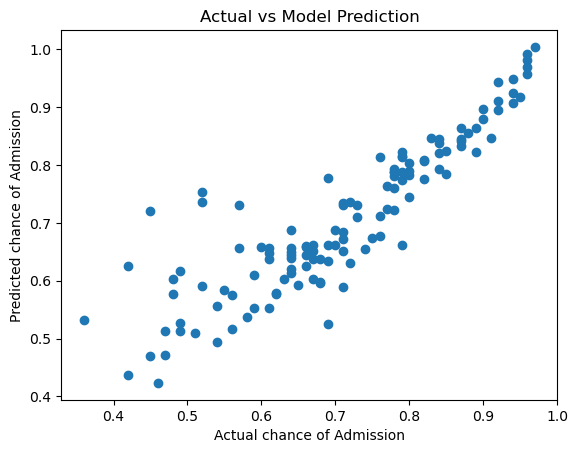

In [150]:
plt.scatter(y_test, y_pred) #now you are checking the actual and predicted data, comparing 
plt.xlabel('Actual chance of Admission')
plt.ylabel('Predicted chance of Admission')
plt.title('Actual vs Model Prediction')
plt.show()

In [152]:
#Evaulate Model Score
#r2_score it will give overall accuracy using (.score)
#above 2 are higher the better

In [154]:
#Mean Absolute Error(MAE)
#Mean Squared Error(MSE)
#Root Mean Squared Error(RMSE)
#above three are Lower the better
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [156]:
y_pred=regression.predict(x_test)

In [158]:
#MAE
#it will make only 4% error
mean_absolute_error(y_test, y_pred)

0.04421359936541999

In [160]:
#MSE
#it will removed the noises 
mean_squared_error(y_test,y_pred)

0.0043091723323515985

In [164]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.06564428636485889

In [168]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=348)

In [170]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV,LassoCV

In [172]:
lasscv = LassoCV(alphas=None,max_iter=10)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [176]:
alphas=lasscv.alpha_
alphas

0.0006090008804969982

In [182]:
lasso_reg= Lasso(alphas)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0006090008804969982)

In [184]:
lasso_reg.score(x_test,y_test)

0.7938036352038629

In [186]:
np.arange(0.001,0.1,0.01)
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [188]:
alphasr=ridgecv.alpha_

In [198]:
ridge_reg=Ridge(alphasr)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [200]:
ridge_reg.score(x_test,y_test)

0.7928351268338167